## Aprendiendo a utilizar aggregation y groupby
***

# Equipo NULL

**Di Nubila Meneghini Vicente Adrian**

**Medina Alexis**

**Miño Alberto**

**Orgoñ Nahiara**

---
**Objetivo**
En este notebook los integrantes del equipo NULL explican los principales métodos de agregación de datos utilizando las herramientas de la librería Pandas.

### Tabla de Contenido

1. [Cargar Librerías](#Cargar-Librerías)
2. [Lectura de archivos](#Lectura-de-archivos)
3. [Agregación de estadísticas](#Agregación-de-estadísticas)
4. [Agregación de estadísticas agrupadas por categoría](#Agregación-de-estadísticas-agrupadas-por-categoría)
- 4.1 [Agrupar por una columna](#Agrupar-por-una-columna)
- 4.2 [Agrupar por dos columnas](#Agrupar-por-dos-columnas)
- 4.3 [Contar el número de registros por categoría](#Contar-el-número-de-registros-por-categoría)

## <font color=#33A5FF>****1. Cargar librerías****<tfont>
***

In [1]:
# importar libreria
import pandas as pd

## <font color=#33A5FA>****2. Lectura de archivos excel****<tfont>
***

Vamos a utilizar un dataset de información de pasajeros del Titanic los tantos disponibles dentro la plataforma Kaggle

Primer paso es cargar en la carpeta archivos la planilla **titanic.xlsx**

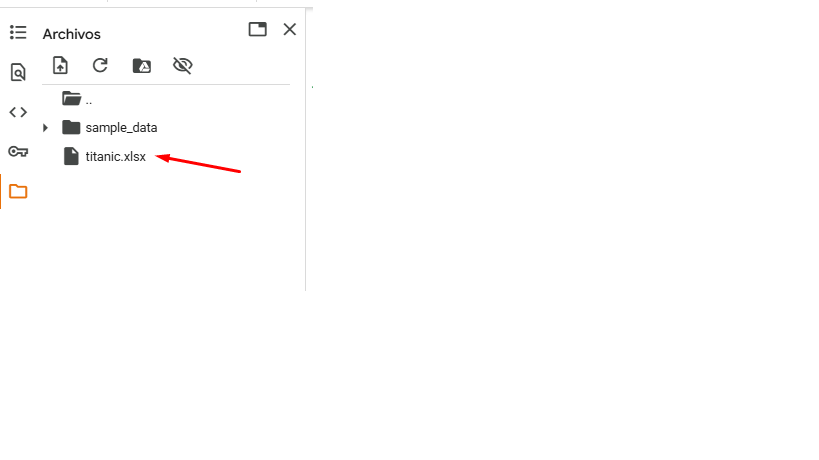

Para leer ficheros de excel vamos a instalar la librería `openpyxl`

Instalar la librería **openpyxl**

* Instalar: !pip install openpyxl



In [2]:
#!pip install openpyxl

In [3]:
# Cargar datos
#titanic = pd.read_excel('titanic.xlsx', index_col = 0, engine='openpyxl')
titanic = pd.read_excel('titanic.xlsx', index_col = 0 )
titanic

ValueError: Excel file format cannot be determined, you must specify an engine manually.

Descripción del las columnas del DataFrame

* **Id_Pasajero:** Id de cada pasajero.

* **Survived:** esta característica tiene valor 0 y 1. 0 para no sobrevivido y 1 para sobrevivido.

* **Clase:** Hay 3 clases: Clase 1, Clase 2 y Clase 3.

* **Nombre:** Nombre del pasajero.

* **Sexo:** Género del pasajero.

* **Edad:** Edad del pasajero.

* **Familiares:** numero de familiares del pasajero.

* **Ticket:** Número de ticket del pasajero.

* **Tarifa:** Indicando la tarifa.

* **Cabina:** La cabina del pasajero.

* **Embarcado:** La categoría embarcada.

In [ ]:
# Leer datos excel con ruta, en caso de que el archivo se encuentre en una ruta diferente
# tail trae los últimos registros lo que nos permite confirmar que el archivo fue cargado completamente
titanic.tail()

,Survived,Clase,Nombre,Sexo,Edad,Familiares,Tiquete,Tarifa,Cabina,Embarcado
Id_Pasajero,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",Masculino,27.0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",Femenino,19.0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Femenino,NaN,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",Masculino,26.0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",Masculino,32.0,0,370376,7.75,NaN,Q


In [ ]:
# Verificar que los datos estén leidos correctamente
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Clase       891 non-null    int64  
 2   Nombre      891 non-null    object 
 3   Sexo        891 non-null    object 
 4   Edad        714 non-null    float64
 5   Familiares  891 non-null    int64  
 6   Tiquete     891 non-null    object 
 7   Tarifa      891 non-null    float64
 8   Cabina      204 non-null    object 
 9   Embarcado   889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


## <font color=#33A5FF>****3. Agregación de estadísticas****<tfont>

#### **¿Cúal es la edad media de los pasajeros?**

In [ ]:
# Edad promedio de los pasajeros
edad_promedio = titanic['Edad'].mean()
print("Edad promedio de los pasajeros : ", round(edad_promedio, 2))

Edad promedio de los pasajeros :  29.7


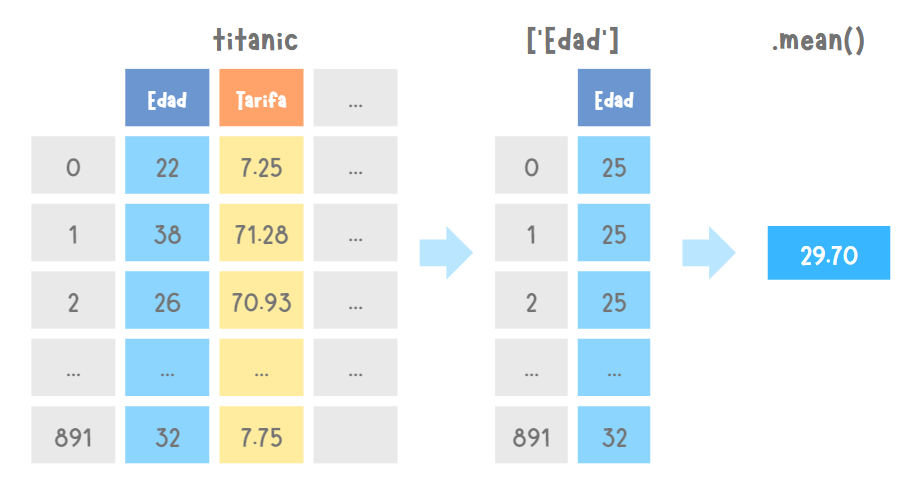

La estadística de agregación también se puede calcular a varias columnas al mismo tiempo.

#### **¿Cuál es la edad promedio y el precio promedio del billete de los pasajeros del Titanic?**

In [ ]:
# recuperamos todos los nombres de las columnas del dataframe
titanic.columns


Index(['Survived', 'Clase', 'Nombre', 'Sexo', 'Edad', 'Familiares', 'Tiquete',
       'Tarifa', 'Cabina', 'Embarcado'],
      dtype='object')

In [ ]:
# Cual es la mediana de la edad y la tarifa
#titanic[['Edad', 'Tarifa']].mean()
titanic[['Edad', 'Tarifa']].mean()




,0
Edad,29.699118
Tarifa,32.205017


In [ ]:
#otra manera de realizar el mismo cálculo con otra presentación
edad_promedio = titanic['Edad'].mean()
print("Edad promedio de los pasajeros : ", round(edad_promedio, 2))
tarifa_promedio = titanic['Tarifa'].mean()
print("Precio promedio de las tarifas : ", round(tarifa_promedio, 2))

Edad promedio de los pasajeros :  29.7
Precio promedio de las tarifas :  32.21


también podemos aplicar el método describe a una o varias columnas.

In [ ]:
titanic[['Edad', 'Tarifa']].describe()
# realiza cálculos matemáticos sobre los atributos que son numéricos, en este caso se decide por edad y tarifa.

,Edad,Tarifa
count,714.000000,891.000000
mean,29.699118,32.205017
std,14.526497,49.693389
min,0.420000,0.000000
25%,20.125000,7.915000
50%,28.000000,14.450000
75%,38.000000,31.000000
max,80.000000,512.330000


En lugar de las estadísticas predefinidas (como lo vimos en el método `describe`), se pueden definir combinaciones específicas de estadísticas de agregación para columnas determinadas utilizando

In [ ]:
# Método agg para calcular el mínimo, másximo y promedio

titanic.agg(
    {
        "Edad": ["min", "max", "mean"],
        "Tarifa": ["min", "max", "mean", "sum"]
    }
)

# se le agrega la suma de todas las tarifas si quisieramos saber solamente para la tarifa el total recaudado
# en la columna Edad no se realiza el cálculo y queda con el valor NaN

,Edad,Tarifa
min,0.420000,0.000000
max,80.000000,512.330000
mean,29.699118,32.205017
sum,NaN,28694.670000


 más detalles sobre las estadísticas descriptivas que se pueden usar.

<div style="text-align: center;">

| **Función**  | **Descripción**                                                |
|--------------|----------------------------------------------------------------|
| `count`      | Número de observaciones no NA                                   |
| `sum`        | Suma de valores                                                 |
| `mean`       | Media de valores                                                |
| `median`     | Mediana aritmética de valores                                   |
| `min`        | Mínimo                                                          |
| `max`        | Máximo                                                          |
| `mode`       | Modo                                                            |
| `abs`        | Valor absoluto                                                  |
| `prod`       | Producto de valores                                             |
| `std`        | Desviación estándar de la muestra corregida por Bessel          |
| `var`        | Varianza imparcial                                              |
| `sem`        | Error estándar de la media                                      |
| `skew`       | Asimetría de la muestra (tercer momento)                        |
| `kurt`       | Curtosis de muestra (4º momento)                                |
| `quantile`   | Cuantil de muestra (valor en %)                                 |
| `cumsum`     | Suma acumulada                                                  |
| `cumprod`    | Producto acumulativo                                            |
| `cummax`     | Máximo acumulado                                                |
| `cummin`     | Mínimo acumulativo                                              |
</div>

[📚 Guía completa: Estadísticas básicas con Pandas](https://pandas.pydata.org/docs/user_guide/basics.html#basics-stats)




## <font color=#33A5FF>****4. Agregación de estadísticas agrupadas por categoría****<tfont>

* Método ``groupby()``

### <font color=#33A5FF>****4.1. Agrupar por una columna****<tfont>

#### ¿Cuál era la edad promedio de los pasajeros hombres y mujeres del Titanic?

#### Flujo de trabajo 1

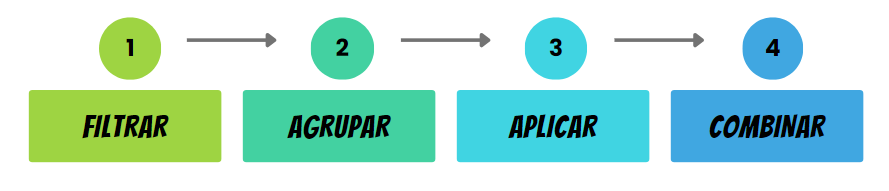

> 🔄 Los pasos de aplicar y combinar normalmente se realizan juntos en pandas.

In [ ]:
# Filtrar df['Sexo', 'Edad']], agrupar por sexo y luego calcular la media para cada grupo
titanic[['Edad', 'Sexo']].groupby('Sexo').mean()

,Edad
Sexo,
Femenino,27.915709
Masculino,30.726645


#### Flujo de trabajo 2

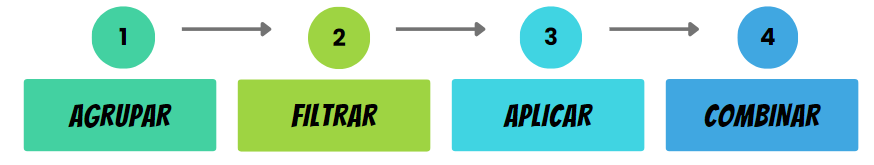

In [ ]:
titanic.groupby('Sexo')['Edad'].mean()

,Edad
Sexo,
Femenino,27.915709
Masculino,30.726645


### <font color=#33A5FF>****4.2. Agrupar por dos columnas****<tfont>

#### ¿Cuál es el precio medio de la tarifa del billete para cada una de las combinaciones de sexo y clase de cabina?

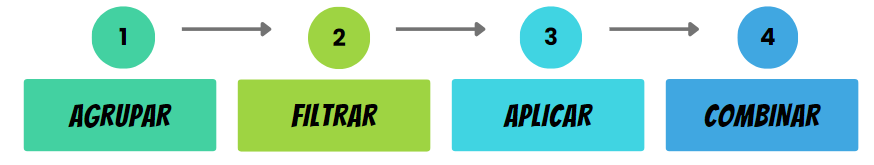

In [ ]:
titanic.groupby(['Sexo', 'Clase'])['Edad'].mean()

Sexo       Clase
Femenino   1        34.611765
           2        28.722973
           3        21.750000
Masculino  1        41.281386
           2        30.740707
           3        26.507589
Name: Edad, dtype: float64

### <font color=#33A5FF>****4.3. Contar el número de registros por categoría****<tfont>

#### ¿Cuál es el número de pasajeros en cada una de las clases de cabina?

Se presentan dos métodos y se obtiene el mismo resultado.


In [ ]:
titanic.groupby('Clase')['Clase'].count()

,Clase
Clase,
1,216
2,184
3,491


In [ ]:
titanic['Clase'].value_counts()

,count
Clase,
3,491
1,216
2,184




# <font color=#33A5FF> Conclusiones:




Las estadísticas de agregación se pueden calcular en columnas o filas enteras.

**groupby** proporciona el poder del patrón dividir-aplicar-combinar .


**value_counts** es un atajo conveniente para contar el número de entradas en cada categoría de una variable.
